In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv(r"C:\Users\hp\Desktop\project\netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.shape

(8807, 12)

In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
df[df.duplicated()].shape

(0, 12)

In [10]:
# Fill missing categorical values with 'Unknown'
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')
df['duration'] = df['duration'].fillna('Unknown')




In [11]:


# Convert 'date_added' to datetime safely, allowing mixed formats
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce', format='mixed')



In [12]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df.dropna(subset=['date_added'], inplace=True)

# Confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   object        
 2   title         8797 non-null   object        
 3   director      8797 non-null   object        
 4   cast          8797 non-null   object        
 5   country       8797 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8797 non-null   int64         
 8   rating        8797 non-null   object        
 9   duration      8797 non-null   object        
 10  listed_in     8797 non-null   object        
 11  description   8797 non-null   object        
 12  year_added    8797 non-null   float64       
 13  month_added   8797 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 1.0+ MB


In [15]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

In [16]:
df.info()
df.describe(include='all')
df['type'].value_counts()


<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   object        
 2   title         8797 non-null   object        
 3   director      8797 non-null   object        
 4   cast          8797 non-null   object        
 5   country       8797 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8797 non-null   int64         
 8   rating        8797 non-null   object        
 9   duration      8797 non-null   object        
 10  listed_in     8797 non-null   object        
 11  description   8797 non-null   object        
 12  year_added    8797 non-null   float64       
 13  month_added   8797 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 1.0+ MB


type
Movie      6131
TV Show    2666
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_24128\4249271903.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


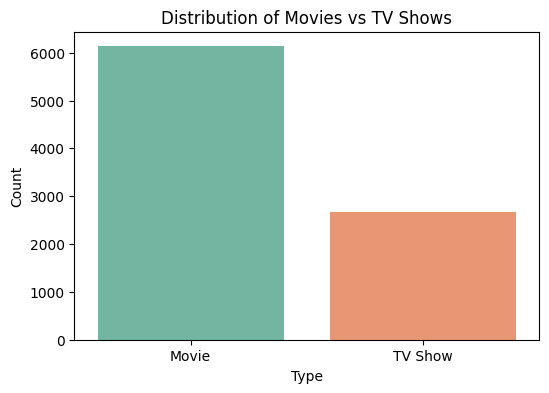

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Distribution of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


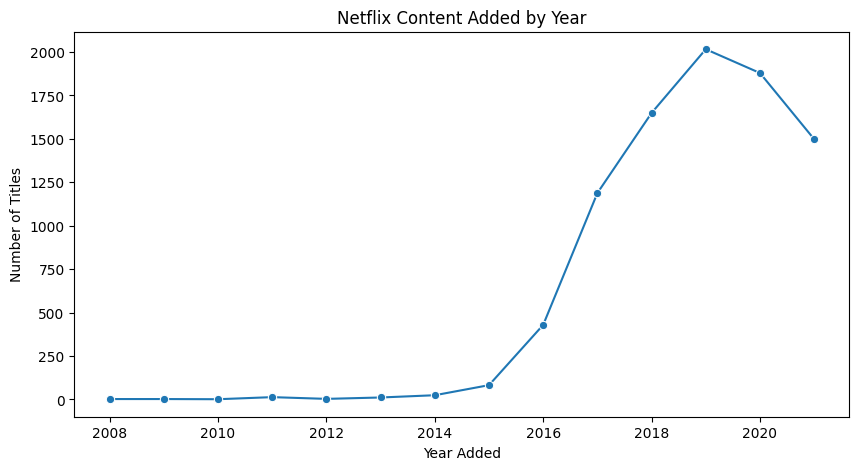

In [49]:
plt.figure(figsize=(10,5))
df['year_added'] = df['year_added'].astype('Int64')  # ensure integer type
yearly = df['year_added'].value_counts().sort_index()

sns.lineplot(x=yearly.index, y=yearly.values, marker='o')
plt.title('Netflix Content Added by Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_28876\2547398486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


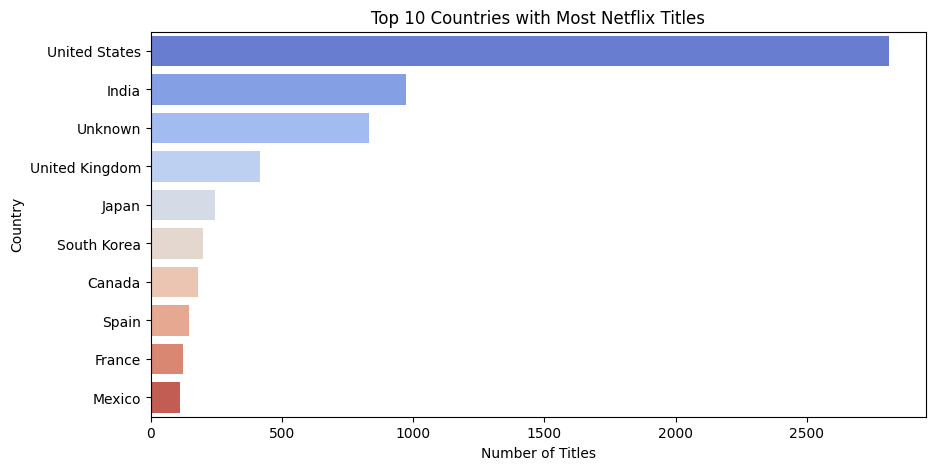

In [50]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries with Most Netflix Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_28876\4157980848.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=top_genres, palette='viridis')


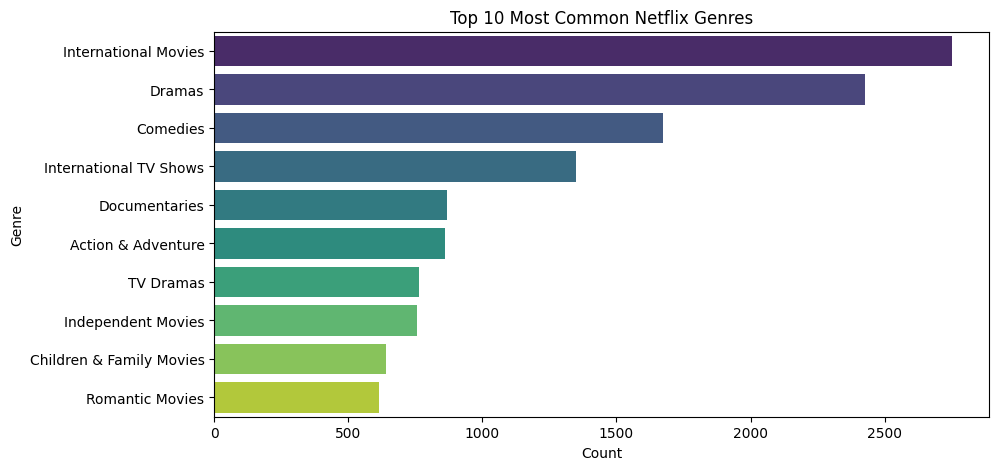

In [51]:
from collections import Counter

# Split genres and count frequency
genre_list = df['listed_in'].str.split(', ')
genre_counts = Counter([g for sublist in genre_list for g in sublist])

top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])

plt.figure(figsize=(10,5))
sns.barplot(x='Count', y='Genre', data=top_genres, palette='viridis')
plt.title('Top 10 Most Common Netflix Genres')
plt.show()


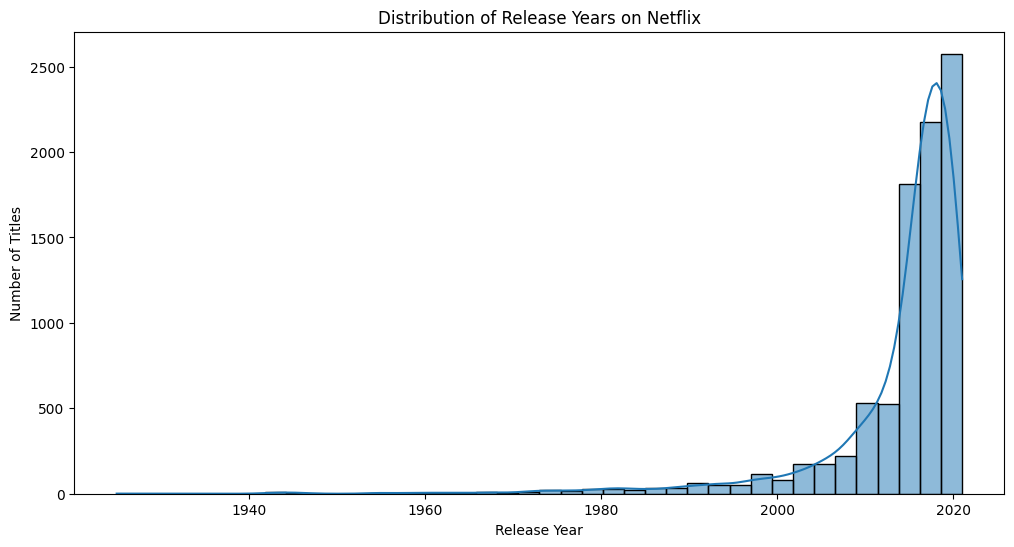

In [52]:
plt.figure(figsize=(12,6))
sns.histplot(df['release_year'], bins=40, kde=True)
plt.title('Distribution of Release Years on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()


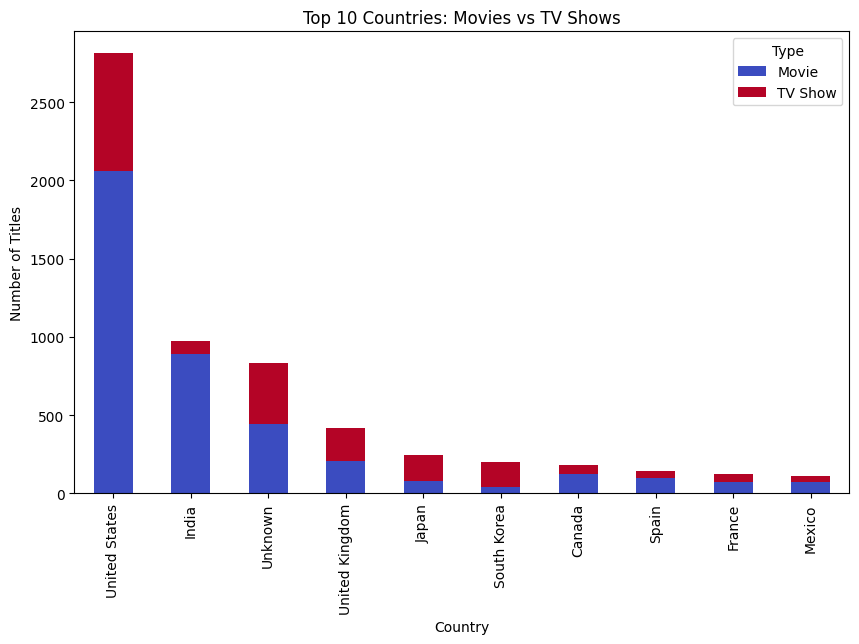

In [55]:
# Count number of Movies and TV Shows per country
country_type = df.groupby(['country', 'type']).size().unstack(fill_value=0)

# Top 10 countries by total content
top_country_type = country_type.sum(axis=1).sort_values(ascending=False).head(10)
top_country_type = country_type.loc[top_country_type.index]

# Plot
top_country_type.plot(kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm')
plt.title('Top 10 Countries: Movies vs TV Shows')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.legend(title='Type')
plt.show()



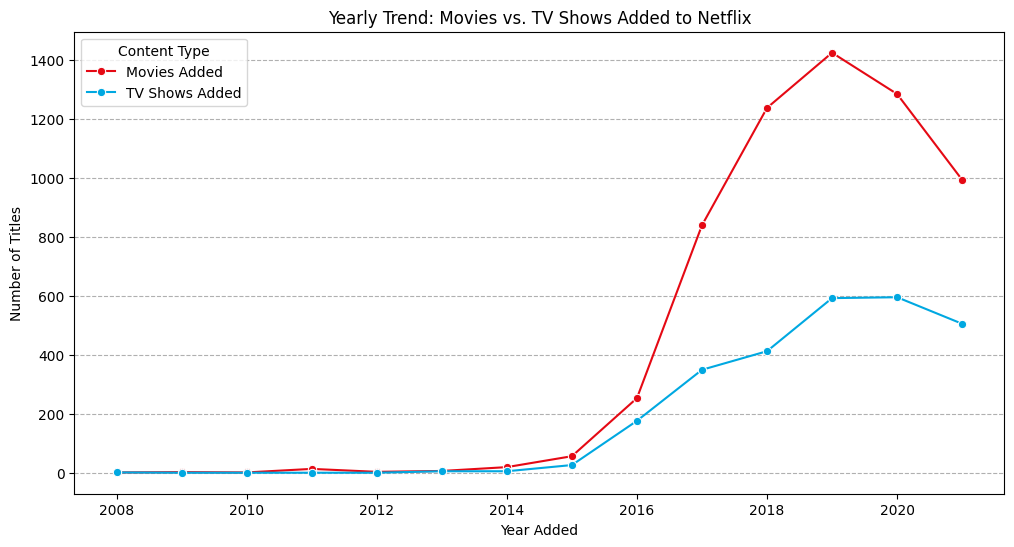

In [21]:
# Create a DataFrame to analyze yearly growth by content type
yearly_type_growth = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)
yearly_type_growth = yearly_type_growth.loc[yearly_type_growth.index >= 2008] # Start from a relevant year

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_type_growth['Movie'], label='Movies Added', marker='o', color='#E50914')
sns.lineplot(data=yearly_type_growth['TV Show'], label='TV Shows Added', marker='o', color='#00A8E1')
plt.title('Yearly Trend: Movies vs. TV Shows Added to Netflix')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend(title='Content Type')
plt.grid(axis='y', linestyle='--')
plt.show()

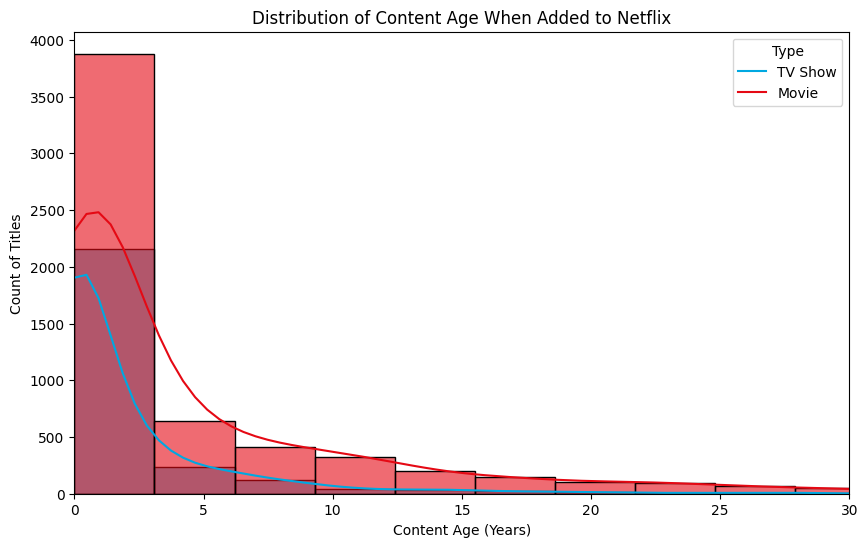

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='content_age_when_added', hue='type', 
             bins=30, kde=True, palette={'Movie': '#E50914', 'TV Show': '#00A8E1'}, 
             alpha=0.6)

plt.title('Distribution of Content Age When Added to Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Count of Titles')
plt.xlim(0, 30) # Limit x-axis for better focus on recent history
plt.legend(title='Type', labels=['TV Show', 'Movie'])
plt.show()